<a href="https://colab.research.google.com/github/kdemertzis/LNexamples/blob/main/autots_univariate_example.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [54]:
!pip install auto-ts

In [55]:
import pandas as pd
import sys
import os
dev = False  # Set to false when using production version of library
if dev:
    # Path to Dev version of autots library
    sys.path.append(os.environ['DEV_AUTOTS'])
    %load_ext autoreload
    %autoreload 2

from auto_ts import auto_timeseries

# Load Dataset

In [56]:
file_path="https://raw.githubusercontent.com/kdemertzis/datashare/main/mous_all.csv"
dataset = pd.read_csv(file_path, engine='python')
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   date    8760 non-null   object
 1   sum     8760 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 137.0+ KB


In [57]:
dataset.head()

,date,sum
0,1/8/15 0:00,168
1,1/8/15 1:00,126
2,1/8/15 2:00,128
3,1/8/15 3:00,115
4,1/8/15 4:00,109


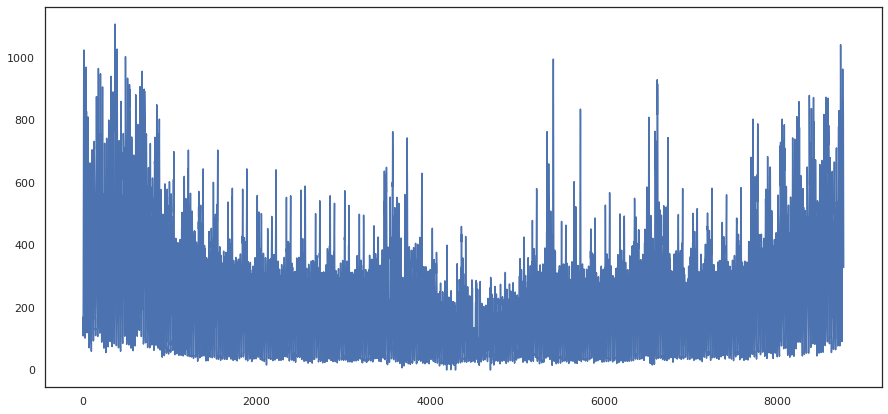

In [58]:
dataset['sum'].plot(figsize=(15,7))

# Train Model

In [59]:
ts_column = 'date'
target = 'sum'
sep = ','

In [60]:
FORECAST_PERIOD = 168

In [61]:
model = auto_timeseries(score_type='rmse',
                time_interval='M',
                non_seasonal_pdq=None, seasonality=False, seasonal_period=12,
                model_type=['best'],
                verbose=2)

Start of Fit.....
Running Augmented Dickey-Fuller test with paramters:
    maxlag: 31 regression: c autolag: BIC
Results of Augmented Dickey-Fuller Test:
+-----------------------------+------------------------------+
|                             | Dickey-Fuller Augmented Test |
+-----------------------------+------------------------------+
|        Test Statistic       |      -5.161449467262264      |
|           p-value           |    1.0533407336521015e-05    |
|          #Lags Used         |             28.0             |
| Number of Observations Used |            8731.0            |
|     Critical Value (1%)     |      -3.431099195237286      |
|     Critical Value (5%)     |     -2.8618710944295014      |
|     Critical Value (10%)    |      -2.566946236596859      |
+-----------------------------+------------------------------+
 this series is stationary
    Target variable given as = sum
Start of loading of data.....
Input is data frame. Performing Time Series Analysis
ts_colum

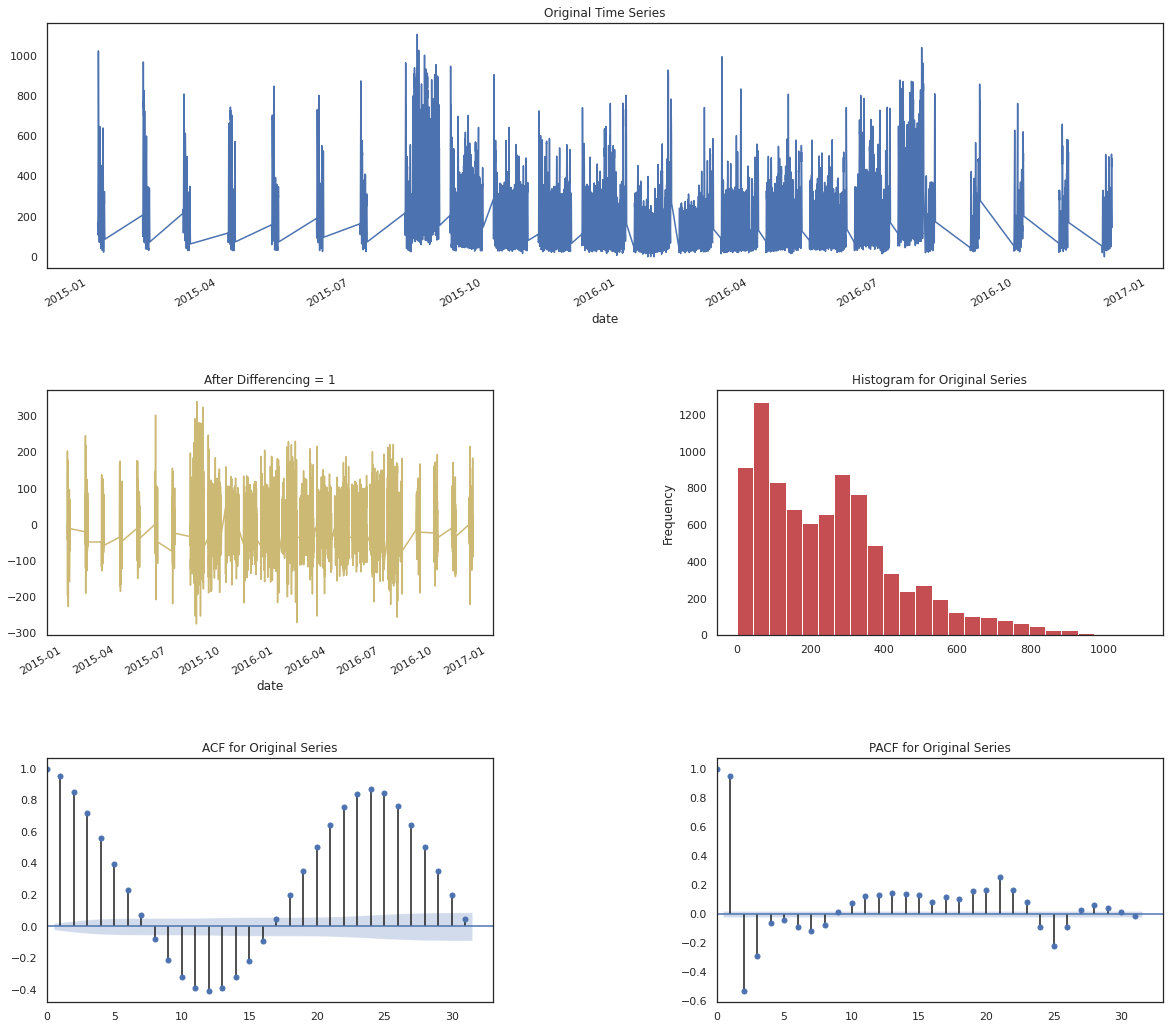

Time Interval is given as M
    Correct Time interval given as a valid Pandas date-range frequency...


Building Prophet Model



Running Facebook Prophet Model...
    Fit-Predict data (shape=(8760, 2)) with Confidence Interval = 0.95...
  Starting Prophet Fit
      No seasonality assumed since seasonality flag is set to False
  Starting Prophet Cross Validation
Max. iterations using expanding window cross validation = 3

Fold Number: 1 --> Train Shape: 8745 Test Shape: 5
    Root Mean Squared Error predictions vs actuals = 674.89
    Std Deviation of actuals = 157.28
    Normalized RMSE = 429%
Cross Validation window: 1 completed

Fold Number: 2 --> Train Shape: 8750 Test Shape: 5
    Root Mean Squared Error predictions vs actuals = 756.03
    Std Deviation of actuals = 33.46
    Normalized RMSE = 2259%
Cross Validation window: 2 completed

Fold Number: 3 --> Train Shape: 8755 Test Shape: 5
    Root Mean Squared Error predictions vs actuals = 510.30
    Std Deviation of actuals = 190.

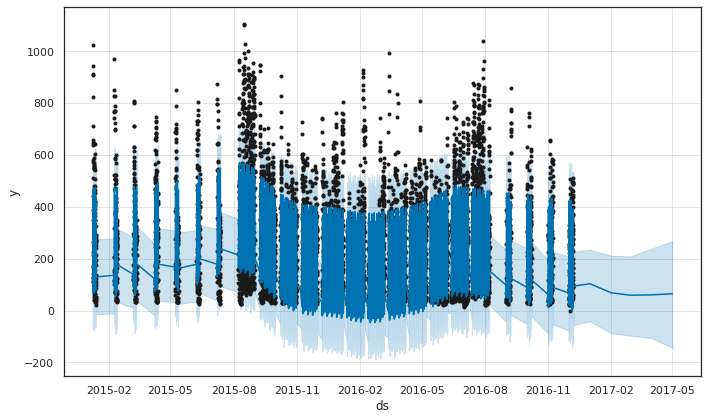

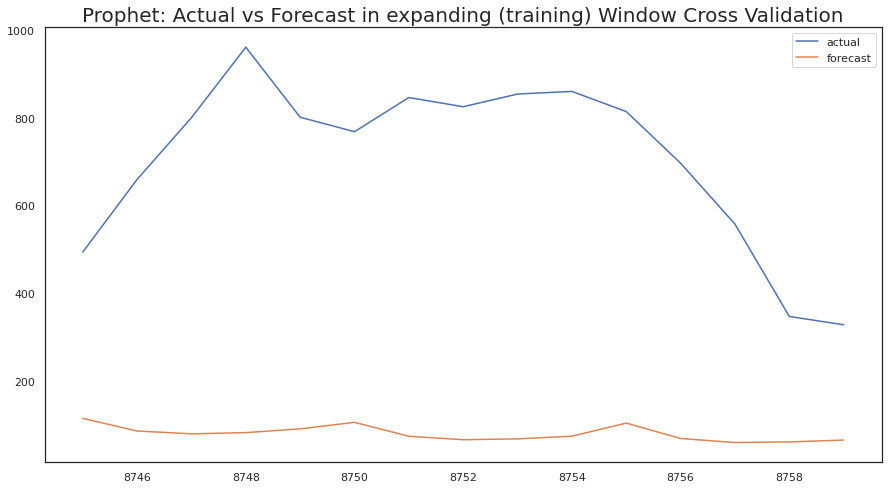

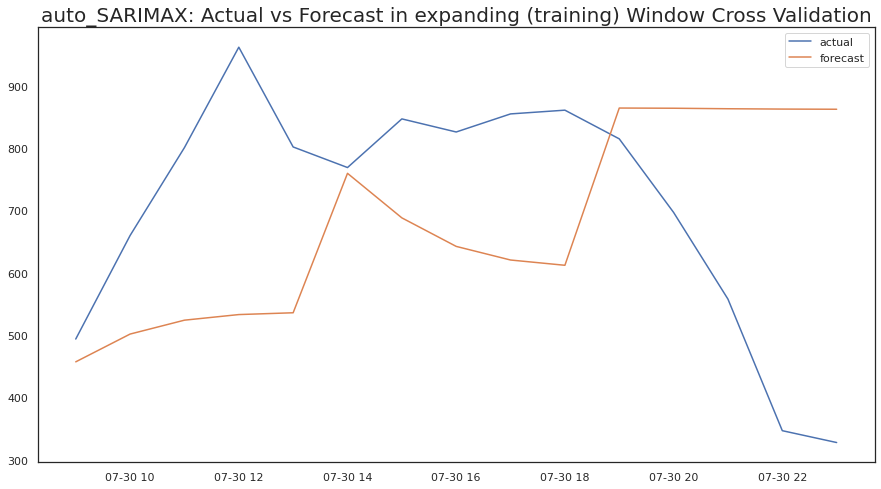

In [62]:
model.fit(
    traindata=dataset,
    # traindata=file_path,  # Alternately, you can specify the file directly
    ts_column=ts_column,
    target=target,
    cv=3,
    sep=sep)        

# Evaluate Results

In [63]:
model.get_leaderboard()

,name,rmse
1,auto_SARIMAX,274.112244
0,Prophet,647.069559
2,ML,inf


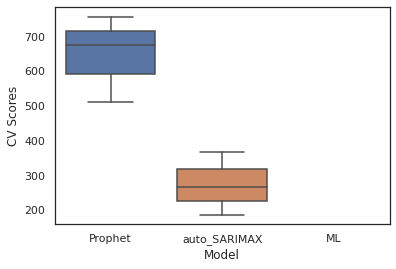

In [64]:
model.plot_cv_scores()

In [65]:
# Make sure all models have the same number of CV folds
model.get_cv_scores()

,Model,CV Scores
0,Prophet,674.885452
1,Prophet,756.025235
2,Prophet,510.297991
3,auto_SARIMAX,267.389710
4,auto_SARIMAX,187.461022
5,auto_SARIMAX,367.486000
6,ML,inf


In [66]:
results_dict = model.get_ml_dict()

In [67]:
results_dict['Prophet']['forecast']  

array([114.23006886,  85.377048  ,  78.95817805,  81.66181248,
        90.24483726, 105.19899201,  73.4251701 ,  65.45522639,
        67.39297048,  73.55616331, 103.44351358,  68.257589  ,
        59.04234648,  60.47994206,  64.67878324])

In [68]:
results_dict['auto_SARIMAX']['forecast'] 

[array([457.40964524, 501.94705621, 524.22645536, 533.20936218,
        536.10210395]),
 array([759.73082091, 688.292502  , 642.53484857, 620.70004885,
        612.24659182]),
 array([864.40921873, 864.09303481, 863.28969272, 862.7481084 ,
        862.48156227])]

In [69]:
results_dict['ML']['forecast'] 

# Forecast Results

In [70]:
# Using Best Model
future_predictions = model.predict(
    testdata=FORECAST_PERIOD
)  
future_predictions

sum,yhat,mean_se,mean_ci_lower,mean_ci_upper
8760,283.726136,50.475245,184.796473,382.655799
8761,277.304470,87.046856,106.695767,447.913173
8762,281.706885,125.818406,35.107341,528.306428
8763,286.758077,162.489798,-31.716074,605.232229
8764,289.975040,195.300453,-92.806815,672.756894


In [71]:
# Using specific model
future_predictions = model.predict(
    testdata=FORECAST_PERIOD,
    model='auto_SARIMAX'
)
future_predictions

sum,yhat,mean_se,mean_ci_lower,mean_ci_upper
8760,283.726136,50.475245,184.796473,382.655799
8761,277.304470,87.046856,106.695767,447.913173
8762,281.706885,125.818406,35.107341,528.306428
8763,286.758077,162.489798,-31.716074,605.232229
8764,289.975040,195.300453,-92.806815,672.756894


In [72]:
# Using specific model
future_predictions = model.predict(
    testdata=FORECAST_PERIOD,
    model='Prophet',
    simple=False

)
future_predictions

Building Forecast dataframe. Forecast Period = 5


,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,daily,daily_lower,daily_upper,weekly,weekly_lower,weekly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
8597,2016-12-01 05:00:00,237.727355,-76.090146,202.248950,237.727355,237.727355,-176.985426,-176.985426,-176.985426,-177.945361,-177.945361,-177.945361,0.959935,0.959935,0.959935,0.0,0.0,0.0,60.741929
8598,2016-12-01 06:00:00,237.715584,-27.881037,250.178227,237.715584,237.715584,-125.558700,-125.558700,-125.558700,-128.101584,-128.101584,-128.101584,2.542883,2.542883,2.542883,0.0,0.0,0.0,112.156884
8599,2016-12-01 07:00:00,237.703814,37.661363,323.355600,237.703814,237.703814,-54.308808,-54.308808,-54.308808,-58.457950,-58.457950,-58.457950,4.149142,4.149142,4.149142,0.0,0.0,0.0,183.395006
8600,2016-12-01 08:00:00,237.692043,127.158911,410.574383,237.692043,237.692043,25.734326,25.734326,25.734326,19.968323,19.968323,19.968323,5.766003,5.766003,5.766003,0.0,0.0,0.0,263.426370
8601,2016-12-01 09:00:00,237.680273,190.906045,474.469937,237.680273,237.680273,98.177045,98.177045,98.177045,90.796824,90.796824,90.796824,7.380221,7.380221,7.380221,0.0,0.0,0.0,335.857318
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8760,2016-12-31 23:00:00,229.040769,-28.095503,264.732755,223.810650,234.259948,-120.488795,-120.488795,-120.488795,-132.311721,-132.311721,-132.311721,11.822926,11.822926,11.822926,0.0,0.0,0.0,108.551974
8761,2017-01-31 23:00:00,220.283560,-74.630606,217.946561,196.983883,245.398928,-147.265306,-147.265306,-147.265306,-132.311721,-132.311721,-132.311721,-14.953585,-14.953585,-14.953585,0.0,0.0,0.0,73.018254
8762,2017-02-28 23:00:00,212.373823,-78.365632,227.686184,166.497715,260.031973,-147.265306,-147.265306,-147.265306,-132.311721,-132.311721,-132.311721,-14.953585,-14.953585,-14.953585,0.0,0.0,0.0,65.108517
8763,2017-03-31 23:00:00,203.616614,-96.590073,235.374204,127.499953,281.661703,-134.829197,-134.829197,-134.829197,-132.311721,-132.311721,-132.311721,-2.517476,-2.517476,-2.517476,0.0,0.0,0.0,68.787417
